In [1]:
import json

loo_file = "./qa_err_raw_loo.jsonl"
prune_file = "./qa_err_raw_prune.jsonl"
reweight_file = "./qa_err_raw_reweight.jsonl"

with open(loo_file, "r") as f:
    loo_result = [json.loads(line) for line in f.readlines()]
with open(prune_file, "r") as f:
    prune_result = [json.loads(line) for line in f.readlines()]
with open(reweight_file, "r") as f:
    reweight_result = [json.loads(line) for line in f.readlines()]

In [2]:
acc_loo = [i["acc_loo"] for i in loo_result][:70]
acc_prune = [i["acc_prune"] for i in prune_result][:70]
acc_reweight = [i["acc_reweight"] for i in reweight_result][:70]
acc_vanilla = [i["acc_baseline"] for i in prune_result][:70]

In [3]:
save_file = "./raw_result.jsonl"
with open(save_file, "r") as f:
    raw_result = [json.loads(line) for line in f.readlines()]

import pandas as pd
raw_result_df = pd.DataFrame(raw_result)

num_relation = 70
relation = raw_result_df["relation"][:num_relation].tolist()
acc_davincii = raw_result_df["acc_davincii"][:num_relation].tolist()

In [4]:
def change_reltaion(relation):
    d = {"drug_or_therapy_used_for_treatment":"drug_or_therapy", "languages_spoken_written_or_signed":"languages_spoken", "located_in_the_administrative_territorial_entity":"located_in",
    "language_of_work_or_name":"language_of_work","medical_condition_treated":"medical_condition", "original_language_of_film_or_TV_show":"original_language_of_film",
    "recommended_unit_of_measurement":"recommended_unit", "office_held_by_head_of_government":"office_held_by"}

    for id in range(len(relation)):
        if relation[id] in d:
            print(relation[id])
            relation[id] = d[relation[id]]

    return relation

relation = change_reltaion(relation)

print(relation)

drug_or_therapy_used_for_treatment
language_of_work_or_name
languages_spoken_written_or_signed
located_in_the_administrative_territorial_entity
medical_condition_treated
office_held_by_head_of_government
original_language_of_film_or_TV_show
recommended_unit_of_measurement
['applies_to_jurisdiction', 'author', 'award_received', 'basic_form_of_government', 'capital', 'capital_of', 'composer', 'continent', 'country', 'country_of_citizenship', 'country_of_origin', 'creator', 'currency', 'developer', 'director', 'discoverer_or_inventor', 'drug_or_therapy', 'educated_at', 'employer', 'field_of_work', 'genetic_association', 'genre', 'has_part', 'head_of_government', 'head_of_state', 'headquarters_location', 'industry', 'influenced_by', 'instance_of', 'instrument', 'language_of_work', 'languages_spoken', 'located_in', 'location', 'location_of_discovery', 'location_of_formation', 'majority_opinion_by', 'manufacturer', 'measured_physical_quantity', 'medical_condition', 'member_of', 'member_of_po

[<matplotlib.lines.Line2D object at 0x2ba1313f6b90>, <matplotlib.patches.PathPatch object at 0x2ba12fe6fdc0>, <matplotlib.patches.PathPatch object at 0x2ba12fe5ce80>, <matplotlib.patches.PathPatch object at 0x2ba12fe5ded0>, <matplotlib.patches.PathPatch object at 0x2ba12fe5ef20>] ['GPT-3.5(175B) w/o retrieval', 'GPT-JT(6B) w/ retrieval', '+LOO', '+Reweight', '+Prune']


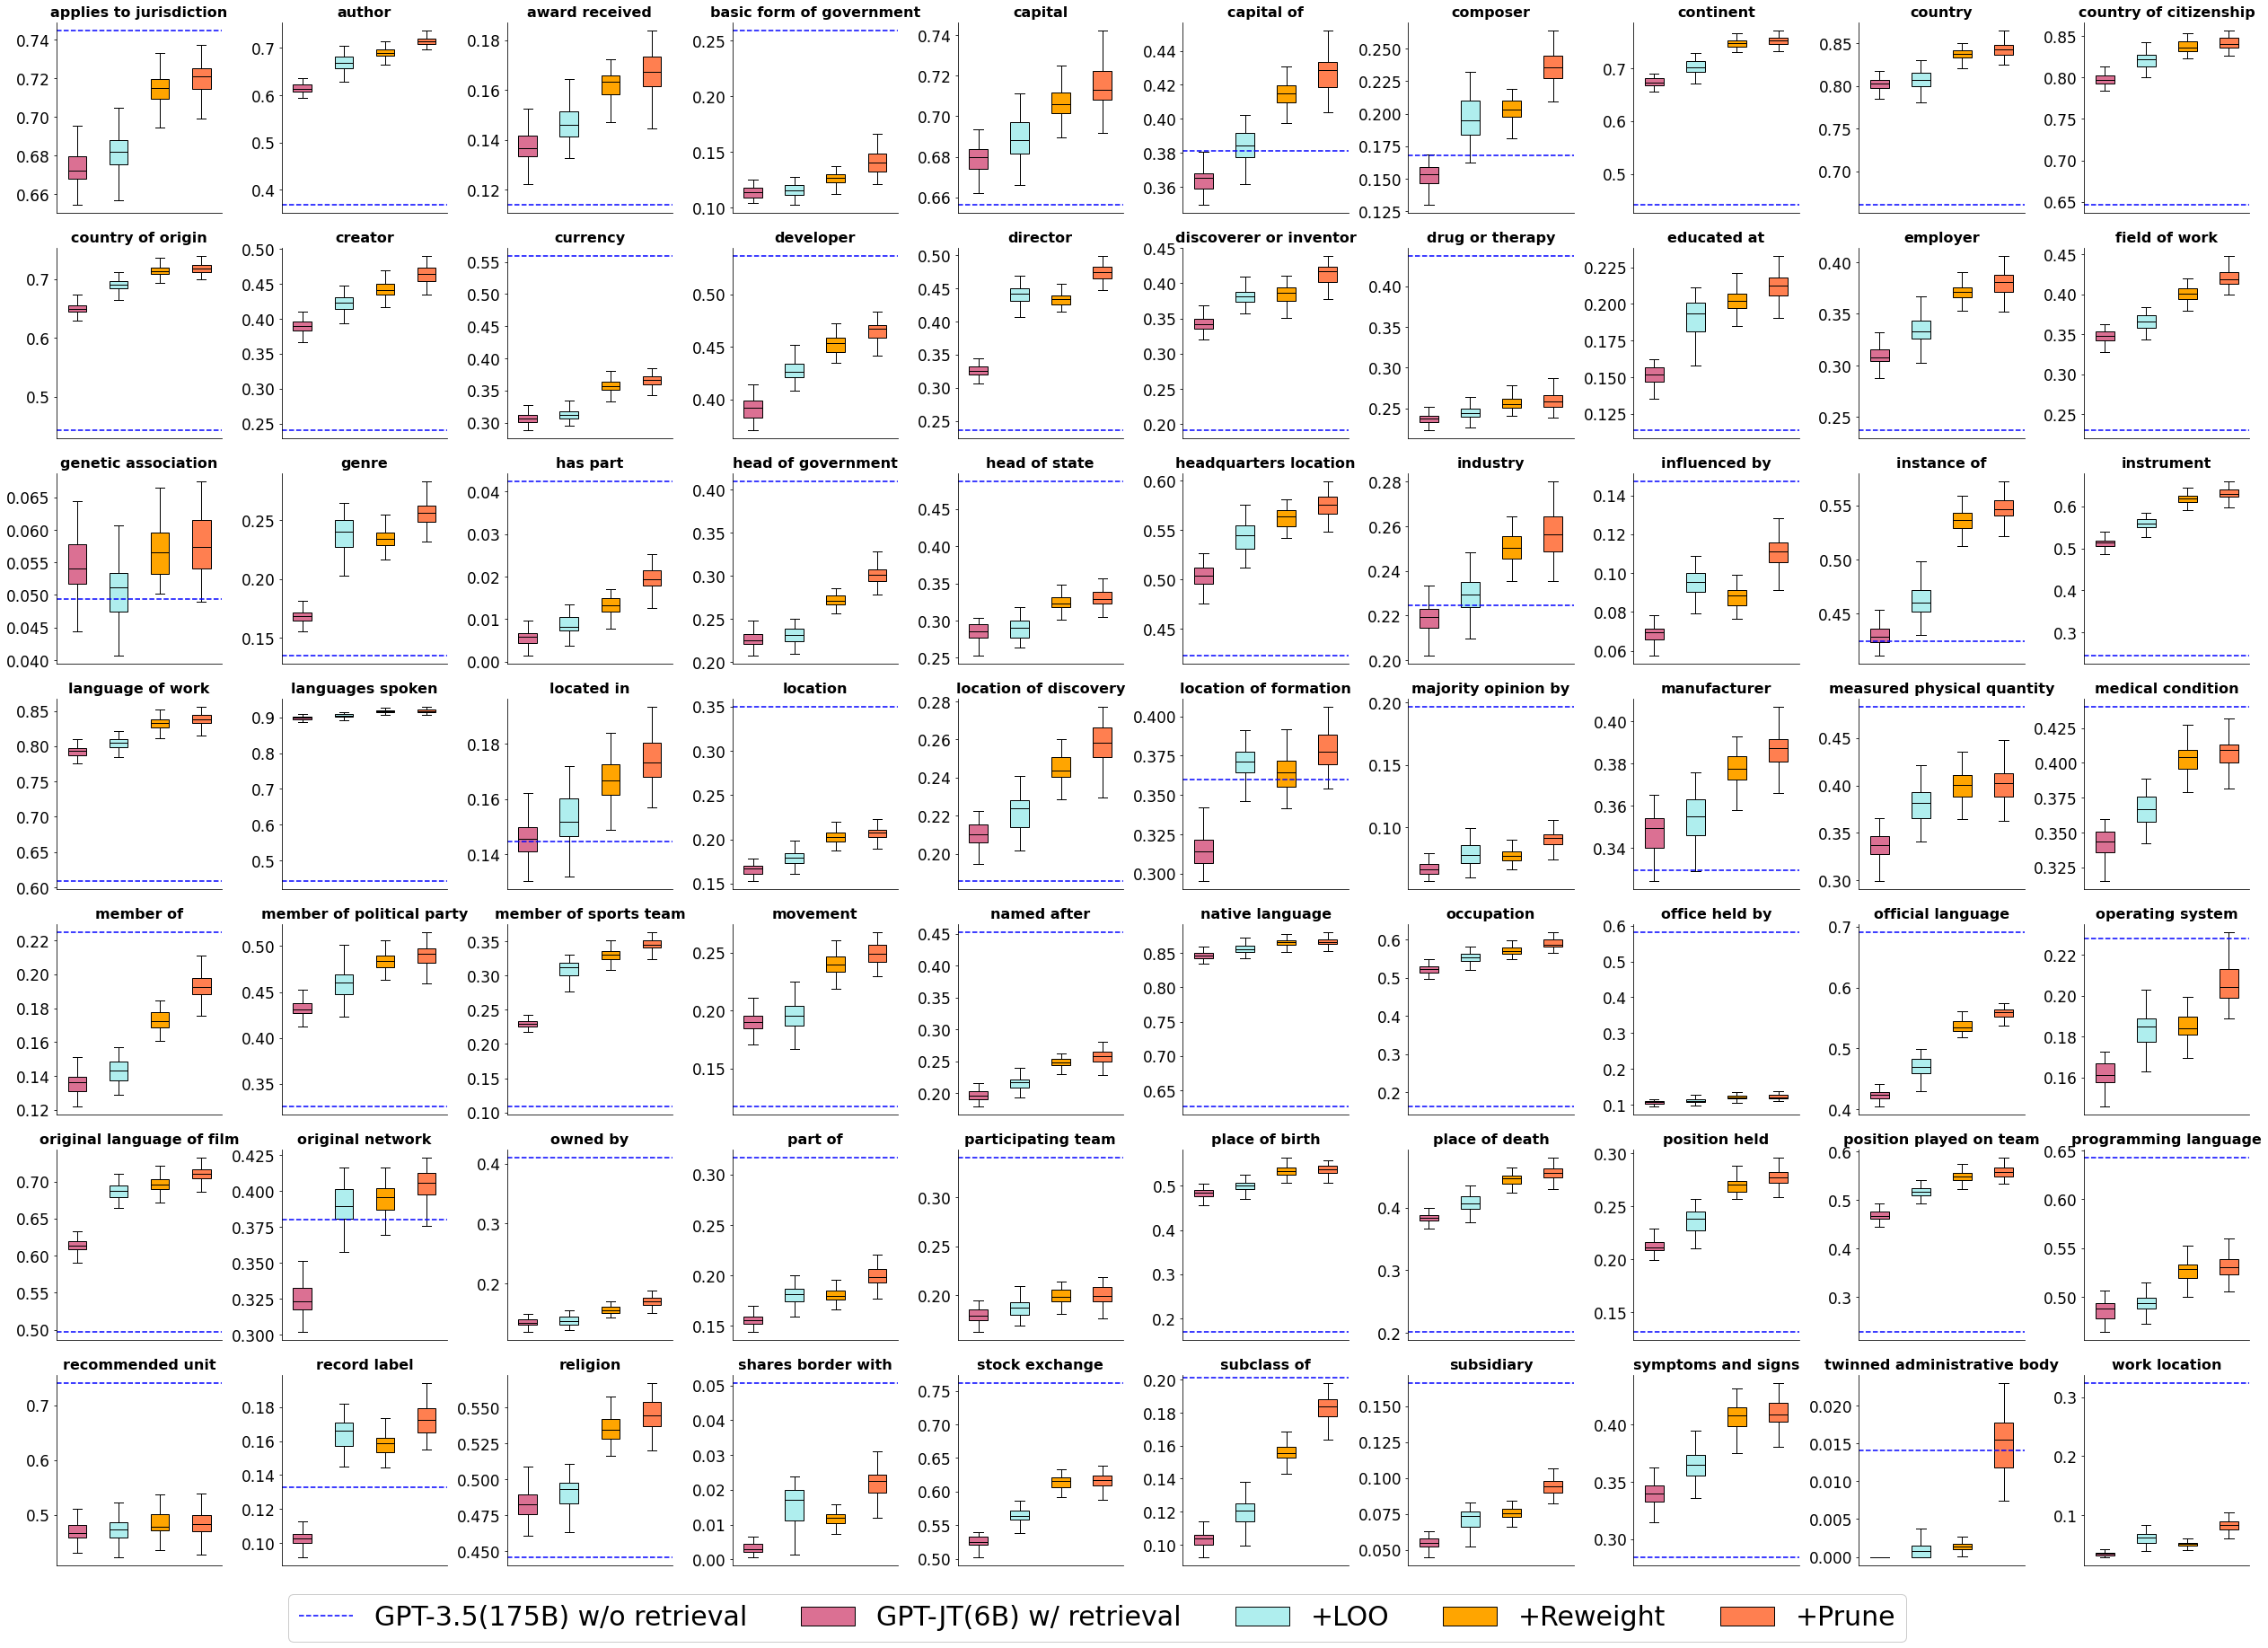

In [7]:
import matplotlib.pyplot as plt
import numpy as np


H = 7
W = 10
width = 3.5


# patterns = ['//', '\\\\', '', '//', "\\", '+', '\\\\', 'x', '++']
colors = ["palevioletred", "paleturquoise", "orange","coral"]

total_bplot = []

fig, axs = plt.subplots(H, W, figsize=(W * width, H * width))
for i in range(H):
    for j in range(W):
        index = i*W+j

        x = ["vanilla", "loo", "reweight", "prune"]
        y = [acc_vanilla[index], acc_loo[index], acc_reweight[index], acc_prune[index]]

        bplot = axs[i, j].boxplot(y, showfliers=False,medianprops=dict(color="black"), patch_artist=True)
        total_bplot = bplot
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
        axs[i, j].set_xticks([])
        # axs[i, j].set(xticklabels= x)
        
        axs[i, j].set_title(relation[index].replace("_", " "), fontsize=16, fontweight='bold')
        axs[i, j].axhline(y=acc_davincii[index], color='b', linestyle='--',label="GPT-3.5(175B) w/o retrieval")
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['right'].set_visible(False)
        axs[i, j].yaxis.set_tick_params(labelsize=17)
        # axs[i, j].set_yticklabels(axs[i, j].get_yticks(), weight='bold')


lines, labels = axs[0, 0].get_legend_handles_labels()
lines.extend(total_bplot['boxes'])
labels.extend(["GPT-JT(6B) w/ retrieval", "+LOO", "+Reweight", "+Prune"])
print(lines, labels)
fig.legend( lines, labels, bbox_to_anchor=(0.85, 0.0),ncol=5, framealpha=1, fontsize=30)


plt.tight_layout()
plt.savefig("results_err.pdf", format="pdf", bbox_inches="tight")
plt.show()